# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [65]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key
weather_api_key = "3a796df526c0a87682d78df1b195ce0b"

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [68]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []
lat_lngs = []
lats = np.random.uniform(-90, 90, size=1500)  # Generate 1500 latitudes
lngs = np.random.uniform(-180, 180, size=1500)  # Generate 1500 longitudes
lat_lngs = zip(lats, lngs)

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 595


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [72]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}q={city}&appid={weather_api_key}&units=metric"
    
    # Log the URL, record, and set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count
    record_count += 1

    # Run API request inside the try block
    try:
        response = requests.get(city_url)
        city_weather = response.json()  # Parse JSON data

        # Extract weather data (NO MISSING QUOTES)
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the city information into the city_data list
        city_data.append({
            "City": city, 
            "Lat": city_lat, 
            "Lng": city_lng, 
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })

    except KeyError:  # Handle missing data issues
        print("City not found.")
        continue

# Indicate that Data Loading is complete
print("Data Loading Complete")


# Convert the city data into a DataFrame
city_data_df = pd.DataFrame(city_data)

# Display the first few rows
city_data_df.head()


Beginning Data Retrieval
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | xiaolingwei
Processing Record 5 of Set 1 | sandnessjoen
Processing Record 6 of Set 1 | adamstown
Processing Record 7 of Set 1 | bikenibeu village
Processing Record 8 of Set 1 | carnarvon
Processing Record 9 of Set 1 | waitangi
Processing Record 10 of Set 1 | puerto ayora
Processing Record 11 of Set 1 | coquimbo
Processing Record 12 of Set 1 | golhisar
Processing Record 13 of Set 1 | vorgashor
Processing Record 14 of Set 1 | east london
Processing Record 15 of Set 1 | isafjordur
Processing Record 16 of Set 1 | klyuchi
Processing Record 17 of Set 1 | nishinoomote
Processing Record 18 of Set 1 | puerto natales
Processing Record 19 of Set 1 | whitehorse
Processing Record 20 of Set 1 | kavieng
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | tranovaho
City not found.
Processing 

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.57,75,97,16.85,TF,1741461934
1,bredasdorp,-34.5322,20.0403,21.44,87,0,2.78,ZA,1741461934
2,ushuaia,-54.8000,-68.3000,8.81,66,75,10.29,AR,1741461437
3,xiaolingwei,32.0333,118.8500,6.34,76,89,3.84,CN,1741461934
4,sandnessjoen,66.0217,12.6316,3.35,64,100,6.93,NO,1741461934


In [73]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data) # YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       572
Date          572
dtype: int64

In [74]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port-aux-francais,-49.3500,70.2167,5.57,75,97,16.85,TF,1741461934
1,bredasdorp,-34.5322,20.0403,21.44,87,0,2.78,ZA,1741461934
2,ushuaia,-54.8000,-68.3000,8.81,66,75,10.29,AR,1741461437
3,xiaolingwei,32.0333,118.8500,6.34,76,89,3.84,CN,1741461934
4,sandnessjoen,66.0217,12.6316,3.35,64,100,6.93,NO,1741461934


In [75]:
# Export the City_Data into a csv
csv_path = r"C:\Users\greci\Desktop\BOOTCAMP\GITLAB WORKING FOLDER\06 - Python APIs Unit\Module 06 Challenge - Due 11-26-2024\output_data\cities.csv"

city_data_df.to_csv(csv_path, index_label="City_ID")

In [77]:
# Read saved data
city_data_df = pd.read_csv(csv_path, index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.57,75,97,16.85,TF,1741461934
1,bredasdorp,-34.5322,20.0403,21.44,87,0,2.78,ZA,1741461934
2,ushuaia,-54.8000,-68.3000,8.81,66,75,10.29,AR,1741461437
3,xiaolingwei,32.0333,118.8500,6.34,76,89,3.84,CN,1741461934
4,sandnessjoen,66.0217,12.6316,3.35,64,100,6.93,NO,1741461934


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

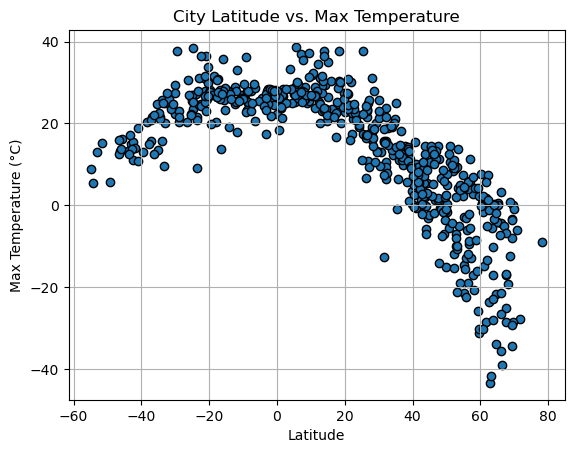

In [80]:
# Ensure the "output_data" directory exists. error fixing so it runs on all computers no referral to my own pc
if not os.path.exists("output_data"):
    os.makedirs("output_data")


# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")



# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs. Max Temperature")
plt.grid(True)


# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

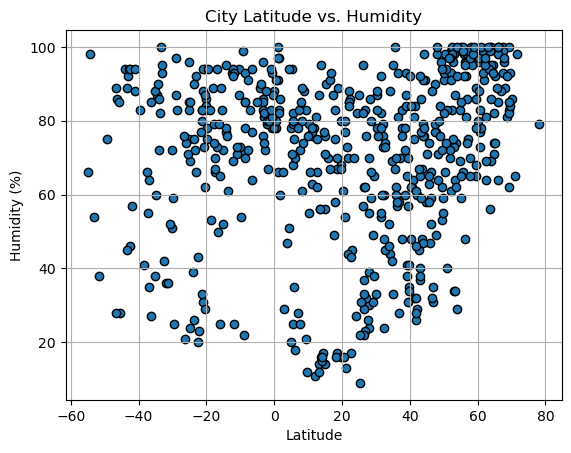

In [89]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()


#### Latitude Vs. Cloudiness

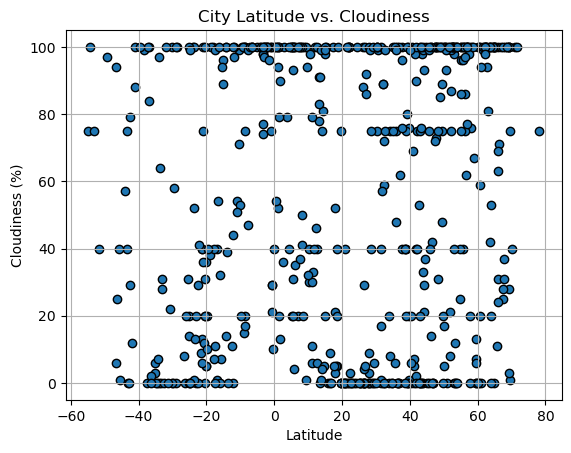

In [91]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

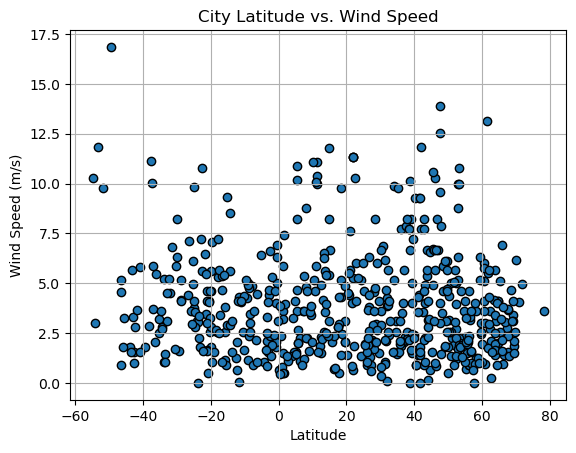

In [93]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude vs. Wind Speed")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [103]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, xlabel, ylabel, coordinates):
    # Perform linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    
    # Calculate regression line
    regress_values = slope * x_values + intercept
    line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

    # Create scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolors="black")
    plt.plot(x_values, regress_values, "r")

    # Add labels and title
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(True)

    # Add regression equation text
    plt.annotate(line_eq, coordinates, fontsize=12, color="red")

    # Show plot
    plt.show()

In [101]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,xiaolingwei,32.0333,118.8500,6.34,76,89,3.84,CN,1741461934
4,sandnessjoen,66.0217,12.6316,3.35,64,100,6.93,NO,1741461934
6,bikenibeu village,1.3673,173.1241,26.98,83,20,3.60,KI,1741461934
11,golhisar,37.1459,29.5088,9.76,70,62,2.30,TR,1741461935
12,vorgashor,67.5833,63.9500,-25.18,100,25,1.54,RU,1741461935


In [105]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port-aux-francais,-49.3500,70.2167,5.57,75,97,16.85,TF,1741461934
1,bredasdorp,-34.5322,20.0403,21.44,87,0,2.78,ZA,1741461934
2,ushuaia,-54.8000,-68.3000,8.81,66,75,10.29,AR,1741461437
5,adamstown,-25.0660,-130.1015,25.86,75,14,3.74,PN,1741461934
7,carnarvon,-24.8667,113.6333,23.43,69,0,9.81,AU,1741461845


###  Temperature vs. Latitude Linear Regression Plot

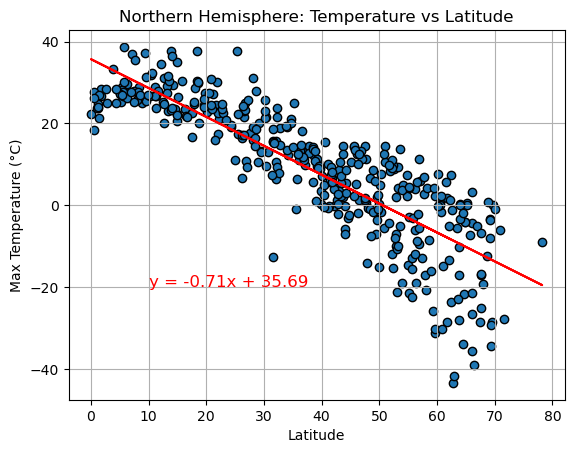

In [111]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"],
                       "Northern Hemisphere: Temperature vs Latitude",
                       "Latitude", "Max Temperature (°C)", (10,-20))


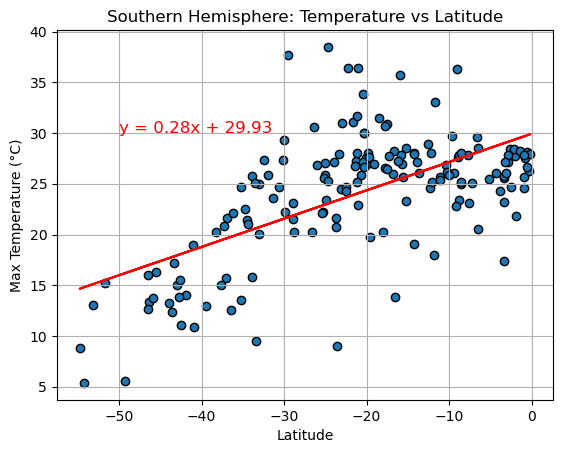

In [113]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"],
                       "Southern Hemisphere: Temperature vs Latitude",
                       "Latitude", "Max Temperature (°C)", (-50,30))


**Discussion about the linear relationship: As latitude is increased and moves away from the equator, the temperature is decreased. In the Northern Hemisphere the slope is negative and moving downwards, lowering the temperature. The Southern Hemisphere the slope is positive and moving upwards, making temperatures higher.** 

### Humidity vs. Latitude Linear Regression Plot

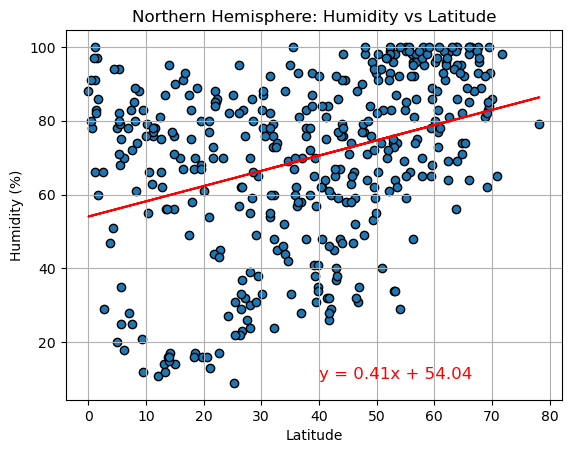

In [115]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"],
                       "Northern Hemisphere: Humidity vs Latitude",
                       "Latitude", "Humidity (%)", (40,10))


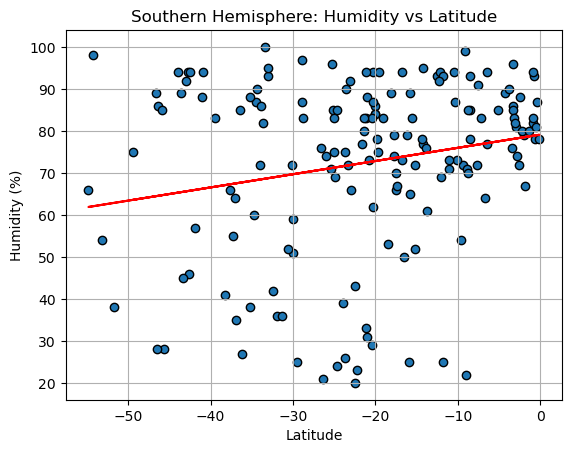

In [117]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"],
                       "Southern Hemisphere: Humidity vs Latitude",
                       "Latitude", "Humidity (%)", (-50,15))


**Discussion about the linear relationship: This plot doesn't seem to portray much correlation between humidity and latitude in both of the hemispheres. Some areas near the equator have higher humidity, but they seem to be scattered.** 

### Cloudiness vs. Latitude Linear Regression Plot

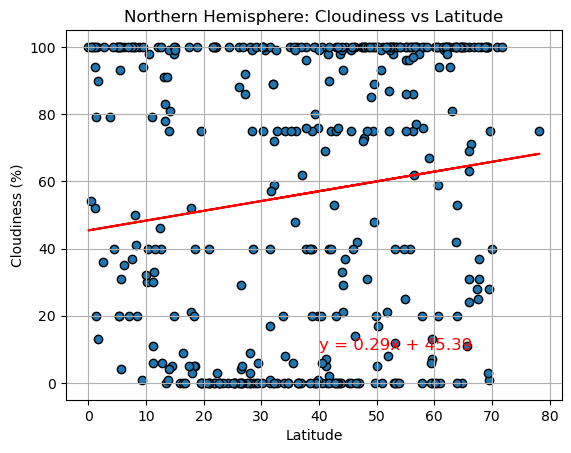

In [119]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"],
                       "Northern Hemisphere: Cloudiness vs Latitude",
                       "Latitude", "Cloudiness (%)", (40,10))


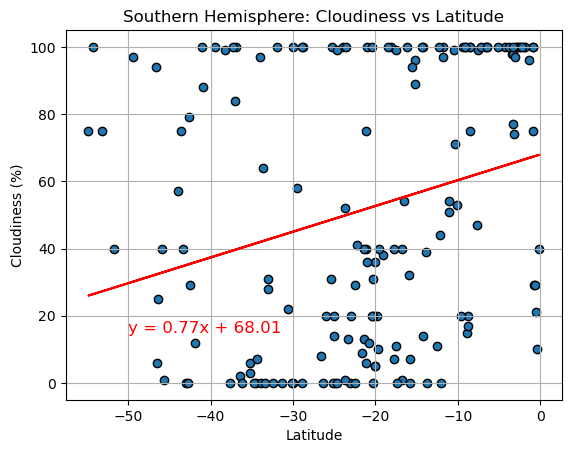

In [121]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"],
                       "Southern Hemisphere: Cloudiness vs Latitude",
                       "Latitude", "Cloudiness (%)", (-50,15))



**Discussion about the linear relationship: Both charts have a positive slope, however, the patterns are scattered all over, not a strong correlation nor prediction of cloudiness.** 

### Wind Speed vs. Latitude Linear Regression Plot

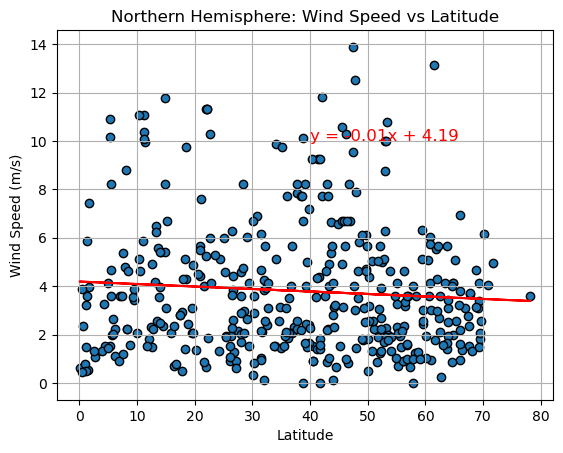

In [125]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"],
                       "Northern Hemisphere: Wind Speed vs Latitude",
                       "Latitude", "Wind Speed (m/s)", (40,10))


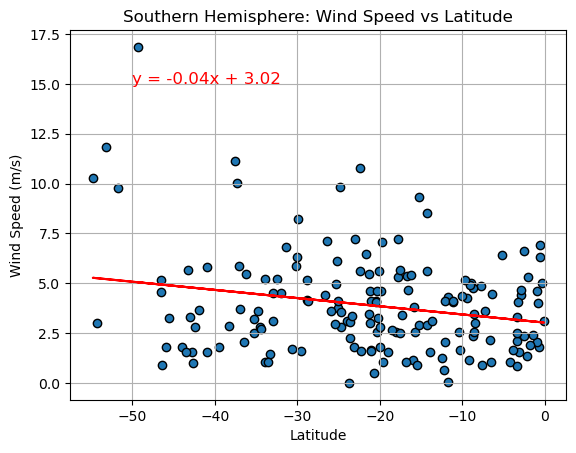

In [127]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"],
                       "Southern Hemisphere: Wind Speed vs Latitude",
                       "Latitude", "Wind Speed (m/s)", (-50,15))


**Discussion about the linear relationship: This plot shows a weak yet negative correlation, higher altitudes can be infered to experience slight lower winds. Multiple factors must be considered to form a conclusion, wind speed can be affected by multiple different variables.**